In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

sns.set(style="whitegrid")
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nMissing values in train:\n", train_df.isnull().sum())
print("\nMissing values in test:\n", test_df.isnull().sum())
print("Imports successful")

Train shape: (891, 8)
Test shape: (418, 7)

Missing values in train:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Missing values in test:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Imports successful


In [2]:
train_df = pd.read_csv("titanic_train.csv")
test_df  = pd.read_csv("titanic_test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.shape
train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train_df.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)
test_df.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

In [5]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)

In [6]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]


In [7]:
categorical_cols = ["Sex", "Embarked"]
numerical_cols = X.columns.drop(categorical_cols)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [10]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 0.8100558659217877


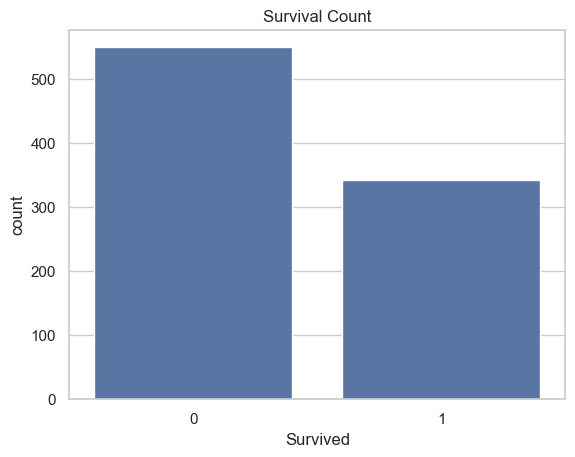

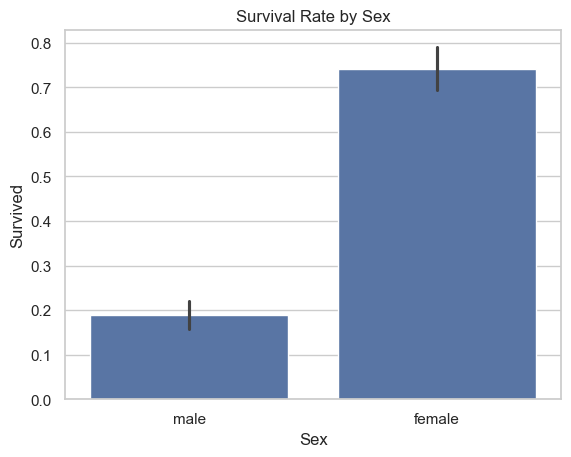

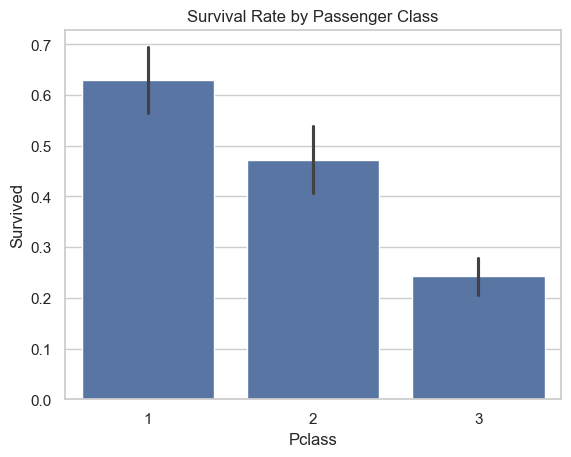

In [21]:
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count")
plt.show()

sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival Rate by Sex")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [11]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [12]:
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

In [13]:
test_df[features].isna().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
test_X = test_df[features]

test_predictions = model.predict(test_X)

test_predictions[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [15]:
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [16]:
test_predictions = model.predict(test_df)
test_predictions[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [17]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
X = train_df[features]
y = train_df["Survived"]

categorical_cols = ["Sex", "Embarked"]
numerical_cols = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_features", numerical_pipeline, numerical_cols),
    ("cat_features", categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_pipeline.fit(X_train, y_train)

val_predictions = model_pipeline.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

test_X = test_df[features]
test_predictions = model_pipeline.predict(test_X)

submission = pd.DataFrame({
    "PassengerId": test_df.get("PassengerId", test_df.index),
    "Survived": test_predictions
})

submission.to_csv("titanic_Passenger_SurvivorData.csv", index=False)
print("Submission file created successfully")


Validation Accuracy: 0.8100558659217877
Submission file created successfully
